In [1]:
print('Welcome to Decision Tree')

Welcome to Decision Tree


In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [3]:
# Loan dataset
data = {
    "Age":    [25, 40, 30, 50, 35, 28, 45],
    "Income": [25, 80, 50, 40, 100, 35, 60],
    "CreditHistory": ["Bad", "Good", "Good", "Bad", "Good", "Good", "Bad"],
    "LoanApproved":  ["No", "Yes", "Yes", "No", "Yes", "Yes", "No"]
}

In [4]:
df = pd.DataFrame(data)

In [5]:
df.head(10)

,Age,Income,CreditHistory,LoanApproved
0,25,25,Bad,No
1,40,80,Good,Yes
2,30,50,Good,Yes
3,50,40,Bad,No
4,35,100,Good,Yes
5,28,35,Good,Yes
6,45,60,Bad,No


In [6]:
df["CreditHistory"] = df["CreditHistory"].map({"Bad":0, "Good":1})
df["LoanApproved"] = df["LoanApproved"].map({"No":0, "Yes":1})

In [7]:
df

,Age,Income,CreditHistory,LoanApproved
0,25,25,0,0
1,40,80,1,1
2,30,50,1,1
3,50,40,0,0
4,35,100,1,1
5,28,35,1,1
6,45,60,0,0


In [8]:
X = df[["Age","Income","CreditHistory"]]
y = df[["LoanApproved"]]

In [9]:
X

,Age,Income,CreditHistory
0,25,25,0
1,40,80,1
2,30,50,1
3,50,40,0
4,35,100,1
5,28,35,1
6,45,60,0


In [10]:
y

,LoanApproved
0,0
1,1
2,1
3,0
4,1
5,1
6,0


In [11]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=0)

In [12]:
clf.fit(X, y)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [13]:
# Test predictions
print(clf.predict([[30, 70, 1]]))  # Age=30, Income=70k, Good history → likely Yes
print(clf.predict([[50, 40, 0]]))  # Age=50, Income=40k, Bad history → likely No

[1]
[0]


C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [14]:
data = pd.read_csv("./data/loan_dataset_500.csv")

In [15]:
data.head()

,Age,Income,CreditHistory,LoanApproved
0,58,114000,Good,Yes
1,48,71000,Good,Yes
2,34,102000,Bad,Yes
3,27,35000,Bad,No
4,40,88000,Good,Yes


In [16]:
data.isnull().sum()

Age              0
Income           0
CreditHistory    0
LoanApproved     0
dtype: int64

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            500 non-null    int64 
 1   Income         500 non-null    int64 
 2   CreditHistory  500 non-null    object
 3   LoanApproved   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


In [18]:
data.shape

(500, 4)

In [19]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [20]:
le = LabelEncoder()
data["LoanApproved"] = le.fit_transform(data["LoanApproved"])
data["CreditHistory"] = le.fit_transform(data["CreditHistory"])

In [21]:
data.head()

,Age,Income,CreditHistory,LoanApproved
0,58,114000,1,1
1,48,71000,1,1
2,34,102000,0,1
3,27,35000,0,0
4,40,88000,1,1


In [22]:
feature_names = ["Age","Income","CreditHistory"]
target = ["LoanApproved"]

In [23]:
X = data[feature_names]
y = data[target]

In [24]:
scaler = StandardScaler()

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [26]:
X_train.head()

,Age,Income,CreditHistory
199,28,20000,1
450,36,25000,0
231,31,94000,0
95,28,40000,0
54,25,23000,0


In [27]:
y_test.shape

(100, 1)

In [28]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [29]:
X_scaled_train

array([[-1.0434462 , -1.59632587,  0.85096294],
       [-0.35879829, -1.42708013, -1.1751393 ],
       [-0.78670323,  0.90851116, -1.1751393 ],
       ...,
       [ 1.60956444,  1.11160606, -1.1751393 ],
       [ 1.60956444,  1.68704159, -1.1751393 ],
       [-0.70112225, -0.78394629,  0.85096294]], shape=(400, 3))

In [30]:
X_scaled_test

array([[-1.64251312, -1.15628693,  0.85096294],
       [-0.44437928,  1.01005861,  0.85096294],
       [ 0.4114306 ,  1.72089074,  0.85096294],
       [ 0.83933554, -1.42708013, -1.1751393 ],
       [ 1.01049752, -0.07311416,  0.85096294],
       [ 1.52398345,  0.40077393,  0.85096294],
       [ 1.52398345,  1.72089074,  0.85096294],
       [ 0.24026862, -0.75009715, -1.1751393 ],
       [ 1.01049752,  1.21315351,  0.85096294],
       [ 1.26724048,  1.4839467 ,  0.85096294],
       [ 1.43840246,  0.90851116, -1.1751393 ],
       [-0.61554126,  0.70541627,  0.85096294],
       [-1.0434462 , -0.07311416,  0.85096294],
       [ 0.06910665,  1.07775691, -1.1751393 ],
       [ 0.06910665, -0.88549374, -1.1751393 ],
       [ 1.26724048,  0.16382988,  0.85096294],
       [-1.7280941 , -1.42708013, -1.1751393 ],
       [ 1.35282147,  0.90851116,  0.85096294],
       [-0.44437928, -0.75009715,  0.85096294],
       [ 0.24026862,  1.04390776,  0.85096294],
       [ 0.58259258,  0.43462308,  0.850

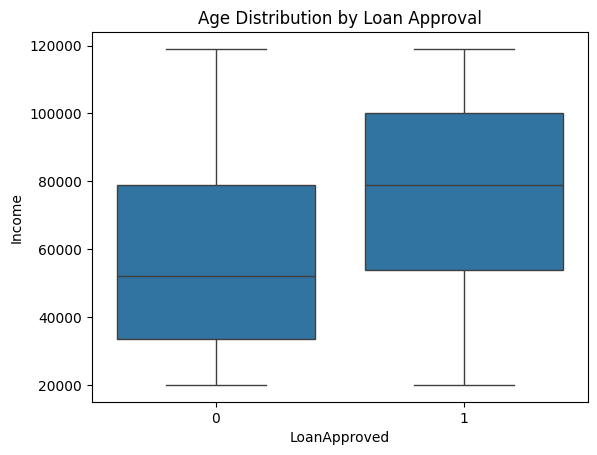

In [31]:
sns.boxplot(data=data, x="LoanApproved", y="Income")
plt.title("Age Distribution by Loan Approval")
plt.show()

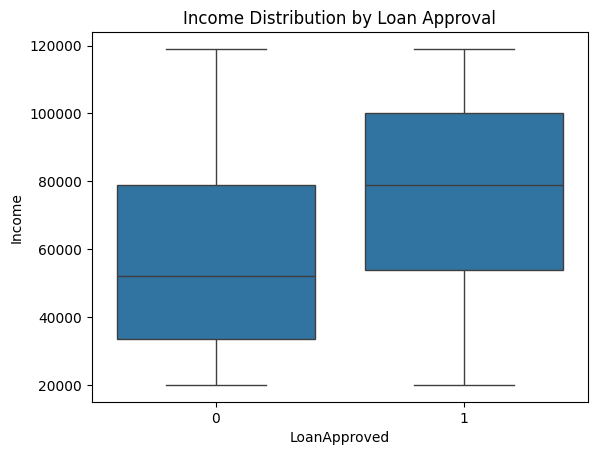

In [32]:
sns.boxplot(data=data, x="LoanApproved", y="Income")
plt.title("Income Distribution by Loan Approval")
plt.show()

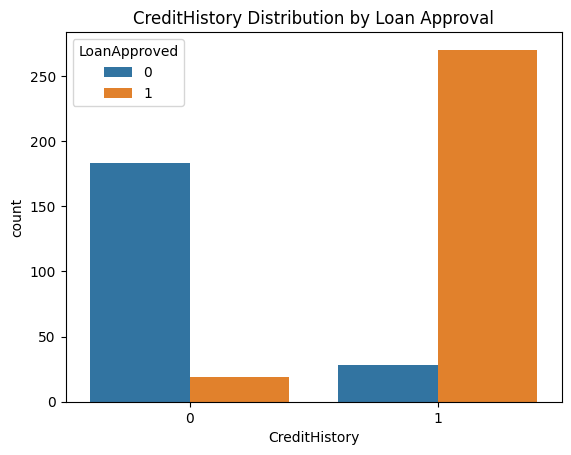

In [33]:
sns.countplot(data=data, x="CreditHistory", hue="LoanApproved")
plt.title("CreditHistory Distribution by Loan Approval")
plt.show()

In [34]:
clf = DecisionTreeClassifier(criterion="entropy", random_state=123)

In [35]:
clf.fit(X_scaled_train, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,123
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [36]:
y_pred = clf.predict(X_scaled_test)

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

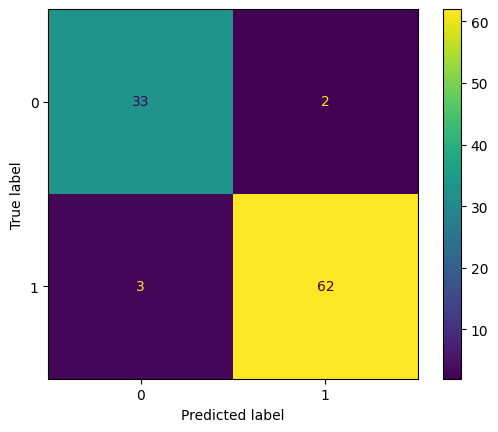

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [39]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.95


In [43]:
data = pd.read_csv("./data/pima-indians-diabetes.csv")

In [44]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


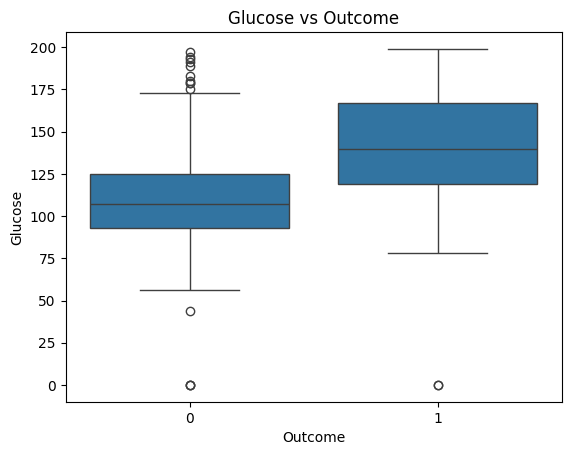

In [51]:
sns.boxplot(data=data, x="Outcome", y="Glucose")
plt.title("Glucose vs Outcome")
plt.show()

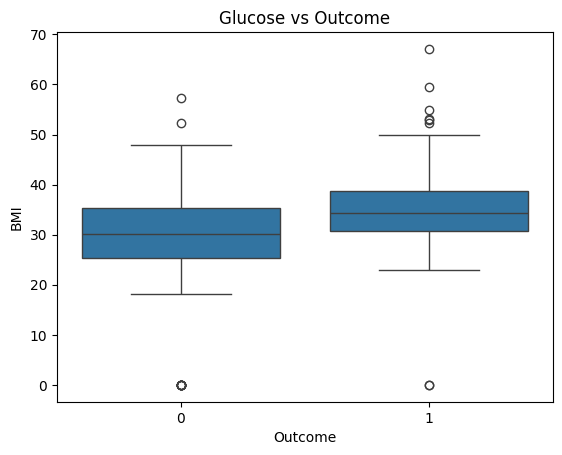

In [52]:
sns.boxplot(data=data, x="Outcome", y="BMI")
plt.title("Glucose vs BMI")
plt.show()

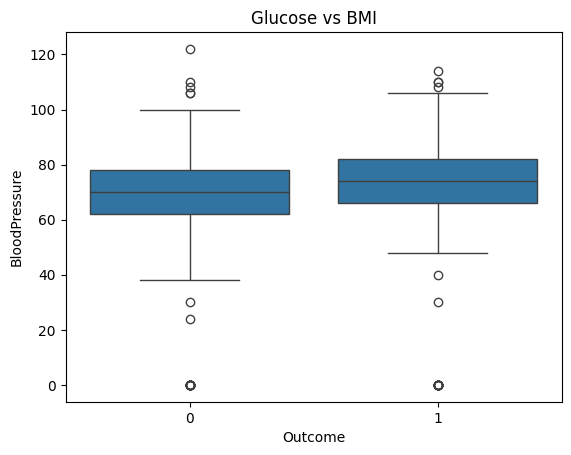

In [53]:
sns.boxplot(data=data, x="Outcome", y="BloodPressure")
plt.title("Glucose vs BMI")
plt.show()

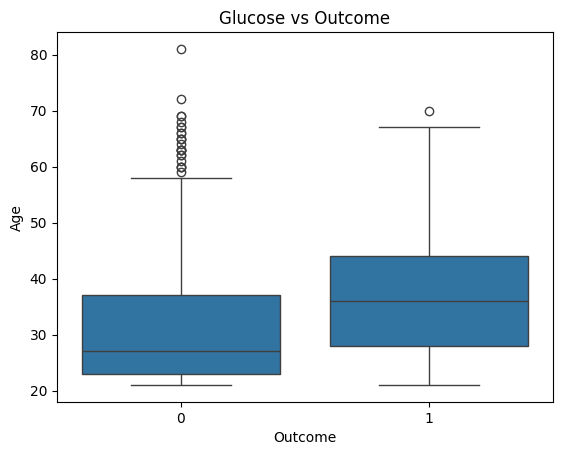

In [54]:
sns.boxplot(data=data, x="Outcome", y="Age")
plt.title("Glucose vs Outcome")
plt.show()

In [59]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [61]:
feature_names = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
target =["Outcome"]
X = data[feature_names]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [62]:
X_train.shape

(614, 8)

In [64]:
X_test.shape

(154, 8)

In [65]:
X.shape

(768, 8)

In [66]:
X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [67]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 318 to 510
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               614 non-null    int64  
 1   Glucose                   614 non-null    int64  
 2   BloodPressure             614 non-null    int64  
 3   SkinThickness             614 non-null    int64  
 4   Insulin                   614 non-null    int64  
 5   BMI                       614 non-null    float64
 6   DiabetesPedigreeFunction  614 non-null    float64
 7   Age                       614 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 43.2 KB


In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
X_train_scaled[1:5]

array([[-0.23288296, -0.25623969, -0.97092627, -0.66825983,  0.04416108,
        -0.35899914,  0.5132899 , -0.70244421],
       [ 0.36918077,  1.17693899,  0.77851761,  1.28650544,  1.15506343,
         0.94171741, -0.20208895, -0.35925682],
       [-0.23288296, -1.37093423,  0.05815837, -1.29882928, -0.71125252,
         0.03515739, -0.58919872,  0.49871163],
       [-1.13597855, -0.63842068,  0.36688376, -1.29882928, -0.71125252,
         0.45559103, -0.81217394, -0.61664736]])

In [73]:
X_test_scaled[1:5]

array([[-0.53391482,  0.18963812, -0.55929242,  0.21453739,  1.73273265,
        -0.59549306,  3.5296492 , -0.70244421],
       [ 2.17537195,  0.53997069,  0.36688376, -1.29882928, -0.71125252,
         0.12712725, -0.124667  ,  0.15552425],
       [-0.53391482, -1.27538898, -0.45638395,  0.0884235 , -0.71125252,
        -0.59549306, -0.52726116, -0.70244421],
       [-1.13597855, -1.17984374,  0.67560915,  0.655936  ,  0.39964983,
         0.7840548 , -0.70378321, -0.8740379 ]])

In [84]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
rclf = RandomForestClassifier(criterion="entropy", random_state=42)

In [89]:
rclf.fit(X_train_scaled, y_train)

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [92]:
y_pred = rclf.predict(X_test_scaled)

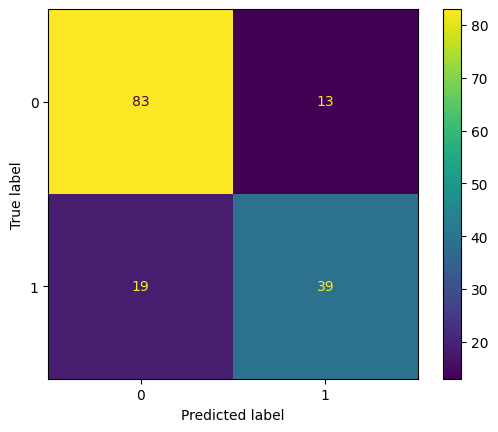

In [93]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()

In [94]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7922077922077922
